In [ ]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [ ]:
def grad(f,x):
    # Для нахождения функции пользуемся численным методом - методом двусторонней разности
    h = 1e-9
    # print(x[:,np.newaxis], np.eye(2))
    l = f(x[:,np.newaxis] + h * np.eye(x.size))
    r = f(x[:,np.newaxis] - h * np.eye(x.size));
    return (l - r)/(2*h)

In [ ]:
def gradient_descent(f,x,lr):
    points = []
    points.append(x)
    while f(x) - f(x - lr * (g := grad(f,x))) > eps:
        x = x - lr * g
        points.append(x)
    return np.array(points)


In [ ]:
def cond_number(f):
    s = np.linalg.inv(f)
    # ord=2 - operator norm
    return np.linalg.norm(f, ord=2) * np.linalg.norm(s, ord=2)

def gen_f(n,k):
    m = np.random.rand(n, n) * 2
    Q, _ = np.linalg.qr(m)
    D = np.diag(np.array([k] + [1] * (n - 1)))

    result = Q @ D @ np.linalg.inv(Q)
    def f_impl(x):
        return x.T @ result @ x

    def f(x):
        return np.apply_along_axis(f_impl, 0, x)
        
    return f

#  Task 1: Gradient Descent(learning rate)

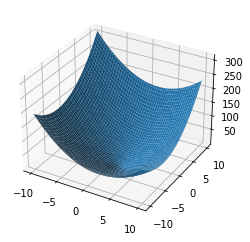

In [ ]:
# Функция
def f(x):
    # Генерация квадратичных функций
    return (x[0] - 2) ** 2 + (x[1] + 3) ** 2
t = np.linspace(-10,10,100)
X, Y = np.meshgrid(t,t)
ax = plt.figure().add_subplot(projection='3d')
ax.plot_surface(X, Y, f(np.stack((X, Y))))

[[-1.          1.        ]
 [-0.39999995  0.19999993]
 [ 0.08000009 -0.44000012]
 [ 0.46400012 -0.95200016]
 [ 0.77120008 -1.36160016]
 [ 1.01696007 -1.68928013]
 [ 1.21356806 -1.95142413]
 [ 1.37085446 -2.16113933]
 [ 1.49668357 -2.32891148]
 [ 1.59734686 -2.46312919]
 [ 1.67787749 -2.57050336]
 [ 1.742302   -2.6564027 ]
 [ 1.7938416  -2.72512216]
 [ 1.83507328 -2.78009773]
 [ 1.86805863 -2.82407819]
 [ 1.89444691 -2.85926256]
 [ 1.91555753 -2.88741005]
 [ 1.93244602 -2.90992804]
 [ 1.94595682 -2.92794243]
 [ 1.95676546 -2.94235395]]


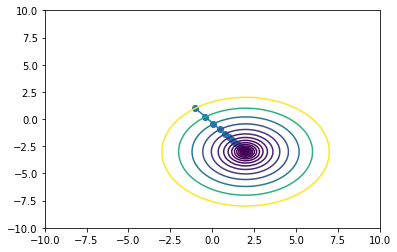

In [ ]:
lr = 0.1
epoch = 20
x = np.array([-1,1])
points = np.zeros((epoch,2))
points[0] = x
for i in range(1,epoch):
    x = x - lr * grad(f, x)
    points[i] = x
print(points)
plt.plot(points[:, 0], points[:, 1], 'o-')
plt.contour(X, Y, f([X, Y]), levels=sorted([f(p) for p in points]))

In [ ]:
#points = gradient_descent(f,np.array([-1,1]),lr)
#print(points)
#print(points[-1],f(points[-1]))
#plt.plot(points[:, 0], points[:, 1], 'o-')
#plt.contour(X, Y, f([X, Y]), levels=sorted([f(p) for p in points]))

# Task 2: Dichotomy



## Дихотомия - одномерный случай

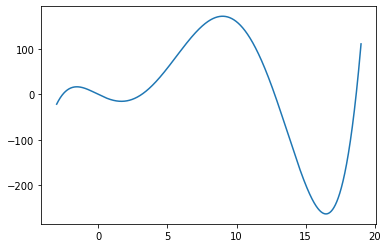

In [ ]:
def f(x):
    return (x / 16 - 1) ** 2 * (2 * x ** 3 - 15 * x) - x ** 2

alpha = -3
beta = 19
t = np.linspace(alpha,beta,10000)
y = (0.2 * t - 1) * (0.2 * t - 6) ** 3 + 70

plt.plot(t,f(t))
plt.show()

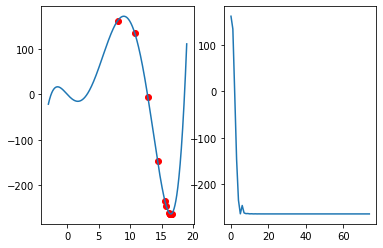

In [ ]:
eps = 1e-9
x = [alpha,beta]

points = []
points.append(x[::])

while (x[1] - x[0]) > eps:
    delta = (x[1] - x[0]) / 2
    x1 = (x[0] + x[1]) / 2 - delta / 2
    x2 = (x[0] + x[1]) / 2 + delta / 2
    if f(x1) < f(x2):
        x[1] = x2
    elif f(x1) == f(x2):
        x[0] = x1
        x[1] = x2
    else: 
        x[0] = x1
    points.append(x[::])

points = np.array(points)

ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)
ax1.scatter((points[::,0] + points[::,1]) / 2,f((points[::,0] + points[::,1]) / 2,), color='red')
ax1.plot(t,f(t))
ax2.plot(f((points[::,0] + points[::,1]) / 2))


## Градиентный спуск на основе дихотомии

In [ ]:
eps = 1e-6
a = np.array([1.0,1.0])
b = np.array([2.0,2.0])
x = np.array([a,b])
n = 2
k = 10

def f(x):
    # Генерация квадратичных функций
    return (x[0] - 2) ** 2 + (x[1] + 3) ** 2

In [ ]:
def dist(a,b):
    return np.linalg.norm(b - a)

In [ ]:
def dichotomy(f,a,b):
    x = np.array([a,b])
    while dist(x[0],x[1]) > eps:
        delta = (x[1] - x[0]) / 2
        x1 = (x[0] + x[1]) / 2 - delta / 2
        x2 = (x[0] + x[1]) / 2 + delta / 2
        new_x = np.copy(x)
        if f(x1) < f(x2):
            new_x[1] = x2
        else: 
            new_x[0] = x1
        x = new_x

    return (x[0] + x[1]) / 2

In [ ]:
def gradient_descent_with_dichotomy(f,x,lr):
    points = []
    points.append(x)
    while f(x) - f(x - lr * (g := grad(f,x))) > eps:
        x = dichotomy(f,x,x - lr * g)
        points.append(x)
    return np.array(points)

46
[[-0.5         0.5       ]
 [-0.10000024 -0.05999967]
 [ 0.2359995  -0.53039932]
 [ 0.51823932 -0.92553512]
 [ 0.75532079 -1.25744913]
 [ 0.9544692  -1.53625696]
 [ 1.12175385 -1.77045549]
 [ 1.26227301 -1.96718233]
 [ 1.38030909 -2.13243281]
 [ 1.47945936 -2.27124319]
 [ 1.56274564 -2.38784396]
 [ 1.63270608 -2.48578856]
 [ 1.69147289 -2.56806209]
 [ 1.74083699 -2.63717181]
 [ 1.78230279 -2.69522394]
 [ 1.81713412 -2.74398779]
 [ 1.8463924  -2.78494938]
 [ 1.8709694  -2.81935717]
 [ 1.89161405 -2.84825968]
 [ 1.90895553 -2.87253775]
 [ 1.92352241 -2.89293139]
 [ 1.93575857 -2.910062  ]
 [ 1.94603691 -2.92445168]
 [ 1.95467076 -2.93653907]
 [ 1.96192316 -2.94669244]
 [ 1.96801523 -2.95522133]
 [ 1.97313254 -2.96238555]
 [ 1.97743104 -2.96840346]
 [ 1.98104183 -2.97345857]
 [ 1.98407487 -2.97770482]
 [ 1.98662266 -2.98127173]
 [ 1.98876278 -2.9842679 ]
 [ 1.99056045 -2.98678463]
 [ 1.99207054 -2.98889876]
 [ 1.99333899 -2.99067458]
 [ 1.99440452 -2.99216633]
 [ 1.99529955 -2.99341937

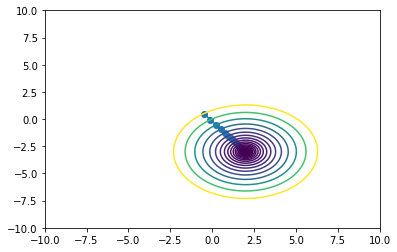

In [ ]:
lr = 0.08
x = np.array([-0.5,0.5])
points = gradient_descent_with_dichotomy(f, x, lr)

print(len(points))
print(points)
plt.plot(points[:, 0], points[:, 1], 'o-')
plt.contour(X, Y, f([X, Y]), levels=sorted([f(p) for p in points]))

#Task 3

# Gradient descent for Himmelblau's function
$f(x,y) = \frac{1}{2}(x + y - 8)^2 + \frac{3}{2}(y - x - 2)^2$

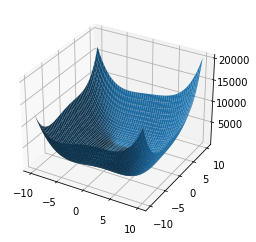

In [ ]:
def f(x):
    return (x[0] ** 2 + x[1] - 11) ** 2 + (x[0] + x[1] ** 2 - 7) ** 2

x = np.linspace(-10,10,1000)
y = np.linspace(-10,10,1000)
X, Y = np.meshgrid(x,y)
ax = plt.subplot(111,projection='3d')
ax.plot_surface(X,Y,f(np.stack((X,Y))))

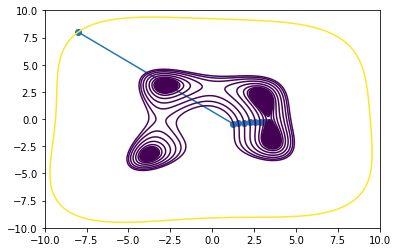

In [ ]:
lr = 0.005
x = np.array([-8.,8.])
points = gradient_descent(f, x, lr)
plt.plot(points[:, 0], points[:, 1], 'o-')
plt.contour(X, Y, f([X, Y]), levels=sorted([f(p) for p in points]))

17
[[-8.          8.        ]
 [-2.72832146  3.19463558]
 [-2.75282759  3.16775138]
 [-2.76964021  3.1524388 ]
 [-2.78110757  3.14359889]
 [-2.78889534  3.1384608 ]
 [-2.79416854  3.13546554]
 [-2.79773198  3.1337186 ]
 [-2.80013715  3.13270085]
 [-2.80175928  3.13210938]
 [-2.802853    3.13176681]
 [-2.80359033  3.1315693 ]
 [-2.80408731  3.13145611]
 [-2.80442242  3.13139169]
 [-2.80464829  3.13135538]
 [-2.80480067  3.13133513]
 [-2.80490349  3.13132401]]


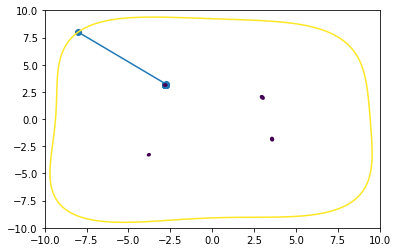

In [ ]:
lr = 0.005
x = np.array([-8.,8.])
points = gradient_descent_with_dichotomy(f, x, lr)

print(len(points))
print(points)
plt.plot(points[:, 0], points[:, 1], 'o-')
plt.contour(X, Y, f([X, Y]), levels=sorted([f(p) for p in points]))

# Gradient descent for random quadratic function(non-trivial variant)
$f(x,y) = \frac{1}{10}x^2+10y^2$

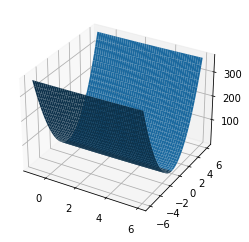

In [ ]:
def f(x):
    return x[0] ** 2 / 10 + 10 * x[1] ** 2

x = np.linspace(-1,6,1000)
y = np.linspace(-6,6,1000)
X, Y = np.meshgrid(x,y)
ax = plt.subplot(111,projection='3d')
ax.plot_surface(X,Y,f(np.stack((X,Y))))

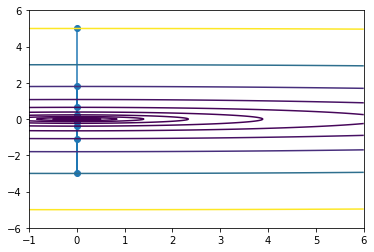

In [ ]:
lr = 0.08
epoch = 50
x = np.array([0.,5.])
points = gradient_descent(f, x, lr)

plt.plot(points[:, 0], points[:, 1], 'o-')
plt.contour(X, Y, f([X, Y]), levels=sorted([f(p) for p in points]))

2
1.2059568669262285e-13


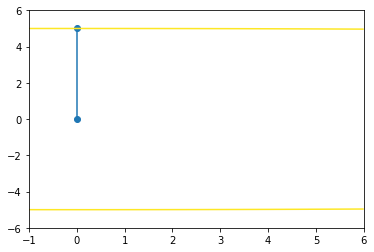

In [ ]:
lr = 0.08
epoch = 2
x = np.array([0.,5.])
points = gradient_descent_with_dichotomy(f, x, lr)

print(len(points))
print(f(points[-1]))
plt.plot(points[:, 0], points[:, 1], 'o-')
plt.contour(X, Y, f([X, Y]), levels=sorted([f(p) for p in points]))

# Gradient descent for Rosenbrock function
$f(x,y) = 100(y - x^2)^2 + (1 - x)^2$

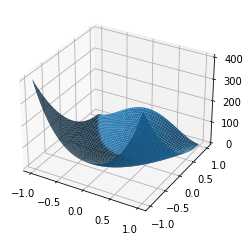

In [ ]:
def f(x):
    return 100 * (x[1] - x[0] ** 2) ** 2 + (1 - x[0]) ** 2
x = np.linspace(-1,1,100)
y = np.linspace(-1,1,100)
X, Y = np.meshgrid(x,y)
ax = plt.subplot(111,projection='3d')
ax.plot_surface(X,Y,f(np.stack((X,Y))))

2


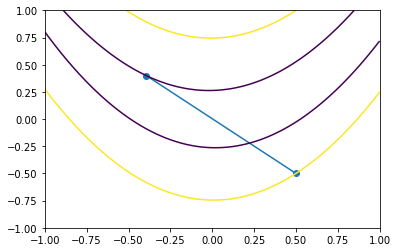

In [ ]:
lr = 0.006

x = np.array([0.5,-0.5])
points = gradient_descent(f, x, lr)
print(len(points))
plt.plot(points[:, 0], points[:, 1], 'o-')
plt.contour(X, Y, f([X, Y]), levels=sorted([f(p) for p in points]))

209


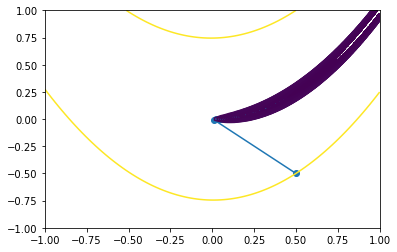

In [ ]:
lr = 0.006
epoch = 10
x = np.array([0.5,-0.5])
points = gradient_descent_with_dichotomy(f, x, lr)
print(len(points))
plt.plot(points[:, 0], points[:, 1], 'o-')
plt.contour(X, Y, f([X, Y]), levels=sorted([f(p) for p in points]))

# Task 4

## 4a

In [ ]:
lr = 0.08

def bad_function(x):
    return x[0] ** 2 / 10 + 10 * x[1] ** 2

def plot_points(ax1, ax2, f, points, method, label):
    t = np.linspace(-6,6,500)
    X, Y = np.meshgrid(t,t)
  

    print(f'{f.__name__}, {method.__name__}: {len(points)}')
    
    ax1.set_title(f'{label}\n{len(points)} итераций')
    ax1.plot_surface(X, Y, f(np.stack((X, Y))))
    

    ax2.plot(points[:, 0], points[:, 1], 'o-')
    ax2.contour(X, Y, f([X, Y]), levels=sorted([f(p) for p in points]))

    ax1.set_xlabel("x")
    ax1.set_ylabel("y")
    ax1.set_zlabel("f(x,y)")
    ax2.set_xlabel("x")
    ax2.set_ylabel("y")

def test():
    fig, axs = plt.subplots(2, 4, figsize=(15, 10))
    fig.tight_layout()

    for i in range(4):    
        axs.flat[i].remove()
        axs.flat[i] = fig.add_subplot(2, 4, i+1, projection='3d')


    x = np.array([0., 5.])
    # regular function
    f = gen_f(2, 2)
    
    plot_points(axs[0, 0], axs[1, 0], f, gradient_descent(f, x, lr), gradient_descent, "Без дихотомии")
    plot_points(axs[0, 1], axs[1, 1], f, gradient_descent_with_dichotomy(f, x, lr), gradient_descent_with_dichotomy, "С дихотомией")

    # bad function 
    f = bad_function 
    plot_points(axs[0, 2], axs[1, 2], f, gradient_descent(f, x, lr), gradient_descent, "Без дихотомии")
    plot_points(axs[0, 3], axs[1, 3], f, gradient_descent_with_dichotomy(f, x, lr), gradient_descent_with_dichotomy, "С дихотомией")

test()

# 4b

In [ ]:
f_acc, g_acc = 0, 0
lr = 0.08

def bad_function(x):
    global f_acc
    f_acc += 1
    return x[0] ** 2 / 10 + 10 * x[1] ** 2


def plot_points(f, points, method):
    global f_acc, g_acc

    print(f'{f.__name__}, {method.__name__}:\nFunction calls: {f_acc}\nGradient calls: {g_acc}')
    
    f_acc, g_acc = 0, 0


def grad(f,x):
    global g_acc
    g_acc += 1
    h = 1e-6
    l = f(x[:,np.newaxis] + h * np.eye(x.size))
    r = f(x[:,np.newaxis] - h * np.eye(x.size));
    return (l - r)/(2*h)

def test():


    x = np.array([0., 5.])
    # regular function
    t = gen_f(2, 2)
    def f(x):
        global f_acc
        f_acc += 1
        return t(x)
    
    plot_points(f, gradient_descent(f, x, lr), gradient_descent)
    plot_points(f, gradient_descent_with_dichotomy(f, x, lr), gradient_descent_with_dichotomy)

    # bad function 
    f = bad_function 
    plot_points(f, gradient_descent(f, x, lr), gradient_descent)
    plot_points(f, gradient_descent_with_dichotomy(f, x, lr), gradient_descent_with_dichotomy)

test()

# 4c

In [ ]:
lr = 0.08
def bad_function(x):
    return x[0] ** 2 / 10 + 10 * x[1] ** 2

def plot_points(ax1, ax2, f, points, method, label, x):
    t = np.linspace(-x[1] * 1.2,x[1] * 1.2,500)
    X, Y = np.meshgrid(t,t)

    print(f'{f.__name__}, {method.__name__}, {x}: {len(points)}')
    
    ax1.set_title(f"{label}\n{x}\n{len(points)} итераций")
    ax1.plot_surface(X, Y, f(np.stack((X, Y))))
    

    ax2.plot(points[:, 0], points[:, 1], 'o-')
    ax2.contour(X, Y, f([X, Y]), levels=sorted([f(p) for p in points]))

    ax1.set_xlabel("x")
    ax1.set_ylabel("y")
    ax1.set_zlabel("f(x,y)")
    ax2.set_xlabel("x")
    ax2.set_ylabel("y")

def test():
    fig, axs = plt.subplots(4, 8, figsize=(30, 12))
    fig.tight_layout()

    for i in range(8):    
        axs.flat[i].remove()
        axs.flat[i] = fig.add_subplot(4, 8, i+1, projection='3d')

    for i in range(16, 24):    
        axs.flat[i].remove()
        axs.flat[i] = fig.add_subplot(4, 8, i+1, projection='3d')

    for i in range(16, 32):    
        pos = axs.flat[i].get_position()
        axs.flat[i].set_position([pos.x0,
                        pos.y0 - 0.1,
                        pos.width,
                        pos.height])


    x_ = np.array([0., 10.])
    
    # regular function
    f = gen_f(2, 2)

    for i in range(0, 8, 2):
        x = x_ * i / 4 + [0., 0.1]
        plot_points(axs[0, i], axs[1, i], f, gradient_descent(f, x, lr), gradient_descent, "Без дихотомии", x)
        plot_points(axs[0, i + 1], axs[1, i + 1], f, gradient_descent_with_dichotomy(f, x, lr), gradient_descent_with_dichotomy, "С дихотомией", x)

    # bad function 
    f = bad_function 
    for i in range(0, 8, 2):
        x = x_ * i / 4 + [0., 0.1]
        plot_points(axs[2, i], axs[3, i], f, gradient_descent(f, x, lr), gradient_descent, "Без дихотомии", x)
        plot_points(axs[2, i + 1], axs[3, i + 1], f, gradient_descent_with_dichotomy(f, x, lr), gradient_descent_with_dichotomy, "С дихотомией", x)

test()

## 4d

In [ ]:
lr = 0.08
def bad_function(x):
    return x[0] ** 2 / 10 + 10 * x[1] ** 2

def plot_points(ax1, ax2, f, points, method, label, scale):
    t = np.linspace(-6,6,500)
    X, Y = np.meshgrid(t,t)

    print(f'{f.__name__}, {method.__name__}, {scale}: {len(points)}')
    
    ax1.set_title(f"{label}\nОсь y увеличена\nв {scale} раз\n{len(points)} итераций")
    ax1.plot_surface(X, Y, f(np.stack((X, Y))))
    

    ax2.plot(points[:, 0], points[:, 1], 'o-')
    ax2.contour(X, Y, f([X, Y]), levels=sorted([f(p) for p in points]))
    ax1.set_xlabel("x")
    ax1.set_ylabel("y")
    ax1.set_zlabel("f(x,y)")
    ax2.set_xlabel("x")
    ax2.set_ylabel("y")

def test():
    fig, axs = plt.subplots(4, 12, figsize=(24, 10))
    fig.tight_layout()

    for i in range(12):    
        axs.flat[i].remove()
        axs.flat[i] = fig.add_subplot(4, 12, i+1, projection='3d')

    for i in range(24, 36):    
        axs.flat[i].remove()
        axs.flat[i] = fig.add_subplot(4, 12, i+1, projection='3d')

    for i in range(24, 48):    
        pos = axs.flat[i].get_position()
        axs.flat[i].set_position([pos.x0,
                        pos.y0 - 0.1,
                        pos.width,
                        pos.height])


    x = np.array([2., 5.])
    
    f = gen_f(2, 2)

    for i in range(0, 12, 2):
        scale = 2 ** ((4 - i) / 2)
        def f_(x):
          return f(np.array([x[0], x[1] * scale]))
        plot_points(axs[0, i], axs[1, i], f_, gradient_descent(f_, x, lr), gradient_descent, "Без дихотомии", scale)
        plot_points(axs[0, i + 1], axs[1, i + 1], f_, gradient_descent_with_dichotomy(f_, x, lr), gradient_descent_with_dichotomy, "С дихотомией", scale)
 
    f = gen_f(2, 8) 
    for i in range(0, 12, 2):
        scale = 2 ** ((4 - i) / 2)
        def f__(x):
          return f(np.array([x[0], x[1] * scale]))
        plot_points(axs[2, i], axs[3, i], f__, gradient_descent(f__, x, lr), gradient_descent, "Без дихотомии", scale)
        plot_points(axs[2, i + 1], axs[3, i + 1], f__, gradient_descent_with_dichotomy(f__, x, lr), gradient_descent_with_dichotomy, "С дихотомией", scale)

test()

# Task 5
Quadratic function generation


In [ ]:
def gen_f_poly(n,k):
    m = np.random.rand(n, n) * 2
    Q, _ = np.linalg.qr(m)
    D = np.diag(np.array([k] + [1] * (n - 1)))

    result = Q @ D @ np.linalg.inv(Q)
    
    parts = []
    for i in range(n):
      for j in range(n):
        x = f'x{i}^2' if i == j else f'x{i}*x{j}'
        parts.append(f'{result[i][j]}*{x}')

    return ' + '.join(parts)

gen_f_poly(2, 1000)

In [ ]:
k = 1000
n = 2
f = gen_f(n, k)

x = np.linspace(-1,1,100)
y = np.linspace(-1,1,100)
X, Y = np.meshgrid(x,y)
ax = plt.subplot(111,projection='3d')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.plot_surface(X,Y,f(np.stack((X,Y))))

# Task 6/7



In [ ]:
def gradient_descent_count(f,x,lr):
  count = 1
  while f(x) - f(x - lr * (g := grad(f,x))) > eps:
      x = x - lr * g
      count += 1
  return count

lr = 0.01
def run_func(n, k):
  n = int(n)
  x = np.array([0.1] * n)
  result = 0
  for _ in range(7):
    f = gen_f(n, k)
    result += gradient_descent_count(f,x,lr)
  result /= 7
  print(n, k, result)
  return result

run_func = np.vectorize(run_func)


# Тут подсчитывается только малое количество n и k, потому что время подсчета очень сильно зависит от n.
# Если поставить nmax = kmax = 1000, то время выполнения будет равно нескольким часам 
n = np.linspace(2, 20, 9)
k = np.linspace(2, 80, 48)
ng, kg = np.meshgrid(n,k,indexing='ij')

vals = run_func(ng, kg)

interp = scipy.interpolate.RegularGridInterpolator((n, k), vals, bounds_error=False)

n = np.linspace(2, 20, 1000)
k = np.linspace(2, 80, 1000)
N, K = np.meshgrid(n,k)

plt.imshow(interp((N, K)), cmap='viridis', extent=[2, 20, 80, 2])
plt.colorbar()
plt.show()


# Bonus: Wolfe's condition


In [ ]:
def check_wolfe(f, x, alpha, dir, c1=0.1, c2=0.9):
  gx = grad(f, x)
  cond1 = f(x + alpha*dir) <= f(x) + alpha * c1 * np.dot(dir, gx)
  cond2 = abs(np.dot(dir, grad(f, x + alpha * dir))) <= abs(c2 * np.dot(dir, gx))
  return cond1 and cond2

In [ ]:
def f(x):
    return (x / 16 - 1) ** 2 * (2 * x ** 3 - 15 * x) - x ** 2

alpha = -3
beta = 19
t = np.linspace(alpha,beta,10000)

plt.plot(t,f(t))
plt.show()

In [ ]:
def find_wolfe(f, x, dir):
    m = mk = 1
    start_alpha = 0.5
    for m in range(1, 20):
        alpha = start_alpha ** m
        if check_wolfe(f, x, alpha, dir):
          mk = m
          break
    return start_alpha ** mk


def gradient_descent_wolfe(f,x):
    points = []
    points.append(x)
    g = grad(f, x)
    if (np.linalg.norm(g) < 1e-6):
      return np.array(points)
    alpha = find_wolfe(f, x, -g)
    while f(x) - f(x - alpha * g) > 1e-6:
        x = x - alpha * g
        points.append(x)
        g = grad(f, x)
        if (np.linalg.norm(g) < 1e-6):
          return np.array(points)
        alpha = find_wolfe(f, x, -g)
    return np.array(points)

In [ ]:
x = np.array([14.0])

print(gradient_descent(f, x, 0.005))

print(gradient_descent_wolfe(f, x))



In [ ]:
def f(x):
    return 100 * (x[1] - x[0] ** 2) ** 2 + (1 - x[0]) ** 2
x = np.linspace(-1,1,100)
y = np.linspace(-1,1,100)
X, Y = np.meshgrid(x,y)
ax = plt.subplot(111,projection='3d')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.plot_surface(X,Y,f(np.stack((X,Y))))

In [ ]:
x = np.array([-0.5,0.5])
points = gradient_descent_wolfe(f,x)
plt.plot(points[:, 0], points[:, 1], 'o-')
plt.xlabel("x")
plt.ylabel("y")
print(len(points))
plt.contour(X, Y, f([X, Y]), levels=sorted([f(p) for p in points]))

In [ ]:
# traditional grad descent vs wolfe
lr = 0.08

def bad_function(x):
    return x[0] ** 2 / 10 + 10 * x[1] ** 2

def plot_points(ax1, ax2, f, points, method, label):
    t = np.linspace(-6,6,500)
    X, Y = np.meshgrid(t,t)
  

    print(f'{f.__name__}, {method.__name__}: {len(points)}')
    
    ax1.set_title(f'{label}\n{len(points)} итераций')
    ax1.plot_surface(X, Y, f(np.stack((X, Y))))
    

    ax2.plot(points[:, 0], points[:, 1], 'o-')
    ax2.contour(X, Y, f([X, Y]), levels=sorted([f(p) for p in points]))
    
    ax1.set_xlabel("x")
    ax1.set_ylabel("y")
    ax2.set_xlabel("x")
    ax2.set_ylabel("y")

def test():
    fig, axs = plt.subplots(2, 6, figsize=(20, 8))

    for i in range(6):    
        axs.flat[i].remove()
        axs.flat[i] = fig.add_subplot(2, 6, i+1, projection='3d')


    x = np.array([4., 5.])
    # regular function
    f = gen_f(2, 2)
    lr = 0.08
    plot_points(axs[0, 0], axs[1, 0], f, gradient_descent(f, x, lr), gradient_descent, "Градиентный спуск")
    lr = 0.16
    plot_points(axs[0, 1], axs[1, 1], f, gradient_descent_with_dichotomy(f, x, lr), gradient_descent_with_dichotomy, "ГС + дихотомия\n(большой шаг)")
    plot_points(axs[0, 2], axs[1, 2], f, gradient_descent_wolfe(f, x), gradient_descent_wolfe, "Вольфе")

    lr = 0.08
    # bad function 
    f = gen_f(2, 6)
    plot_points(axs[0, 3], axs[1, 3], f, gradient_descent(f, x, lr), gradient_descent, "Градиентный спуск")
    lr = 0.16
    plot_points(axs[0, 4], axs[1, 4], f, gradient_descent_with_dichotomy(f, x, lr), gradient_descent_with_dichotomy, "ГС + дихотомия\n(большой шаг)")
    plot_points(axs[0, 5], axs[1, 5], f, gradient_descent_wolfe(f, x), gradient_descent_wolfe, "Вольфе")

test()